# Capstone Project: Modeling (SF Only)

### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

### Datasets

In [2]:
capstone_df = pd.read_csv("../data/final_sf_only.csv")

In [3]:
capstone_df["target"] = capstone_df["categories"].map(lambda x: 1 if x == "Coffee Shop" else 0)

In [4]:
capstone_df.drop(columns = ["area","categories","name"], inplace = True)

In [5]:
capstone_df.head()

,Acai House,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Alternative Healer,American Restaurant,Antique Shop,Arcade,...,Wings Joint,Yoga Studio,user_rate_as_pct_pop,freq,venues_per_capita,cs_per_capita,price_level,rating,user_ratings_total,target
0,0.000000,12390.638346,4409.203400,19769.078464,19864.970497,19637.364103,3865.175985,4471.327568,5998.301290,5658.816921,...,1776.379198,6409.645027,0.000000,0.000690,0.001645,0.000078,0.0,0.0,0.0,0
1,19657.561753,8921.409814,16500.499815,350.278459,330.409949,417.205791,20661.813705,17750.797057,18066.255730,17564.252374,...,19783.919906,15843.898038,0.000049,0.002759,0.001645,0.000078,3.0,4.2,55.0,0
2,5044.150569,8878.924303,4913.688129,17810.483593,17868.986719,17703.968439,3270.820319,4868.367787,4196.255404,623.604989,...,3666.299697,4410.478314,0.000049,0.002759,0.001645,0.000078,3.0,4.4,86.0,0
3,5446.588832,8908.429574,5223.794971,17872.207917,17926.844217,17768.511901,3422.825086,5135.743552,4198.856441,221.636175,...,4017.493851,4494.291723,0.000049,0.002759,0.001645,0.000078,0.0,0.0,0.0,0
4,19414.252232,8843.519328,16269.925168,355.700031,478.638729,250.411778,20478.975122,17588.877509,17903.203556,17416.799385,...,19569.051677,15672.623411,0.000049,0.002759,0.001645,0.000078,3.0,4.0,32.0,0


### Model

##### Setting up X and y

In [6]:
X = capstone_df.drop(columns="target")
y = capstone_df["target"]

##### Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

##### SMOTE

In [8]:
smo = SMOTE()
X_train_smote, y_train_smote = smo.fit_resample(X_train, y_train)

#### Logistic Regression

In [54]:
logreg = LogisticRegression()

In [55]:
logreg_params = {
    "penalty" : ["none"],
    "C" : [0.00001,0.00005,0.0001,0.0005,0.001],
    "class_weight" : ["balanced", None],
    "solver" : ["newton-cg", "lbfgs", "sag", "saga"],
    "max_iter" : [100,500,1000]
}

In [56]:
gs_logreg = GridSearchCV(logreg,logreg_params,cv=3)

In [57]:
gs_logreg.fit(X_train_smote,y_train_smote)

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' wil

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line sear

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to conv

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line sear

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. In

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: Co

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478:

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478:

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which me

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The lin

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increa

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The lin

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which me

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: Co

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not 

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which me

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: Co

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not 

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which me

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478:

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which me

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which me

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: Co

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not 

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which me

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 5e-05, 0.0001, 0.0005, 0.001],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 500, 1000], 'penalty': ['none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [58]:
gs_logreg.best_params_

{'C': 1e-05,
 'class_weight': None,
 'max_iter': 500,
 'penalty': 'none',
 'solver': 'newton-cg'}

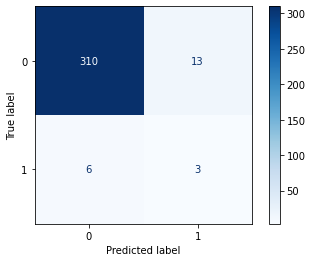

In [59]:
preds_logreg = gs_logreg.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, preds_logreg).ravel()

plot_confusion_matrix(gs_logreg, X_test, y_test, cmap='Blues', values_format='d');

In [60]:
logreg_train_score = gs_logreg.score(X_train_smote,y_train_smote)
logreg_test_score = gs_logreg.score(X_test,y_test)
logreg_test_sensitivity = tp / (tp + fn)
logreg_test_specificty = tn / (tn + fp)
logreg_roc_auc = roc_auc_score(y_test,gs_logreg.predict_proba(X_test)[:,1])

In [61]:
print(f'Logistic Regression Train Accuracy: {logreg_train_score}')
print(f'Logistic Regression Test Accuracy: {logreg_test_score}')
print(f'Logistic Regression Test Sensitivity: {logreg_test_sensitivity}')
print(f'Logistic Regression Test Specificity: {logreg_test_specificty}')
print(f'Logistic Regression Test ROC-AUC Score: {logreg_roc_auc}')

Logistic Regression Train Accuracy: 1.0
Logistic Regression Test Accuracy: 0.9427710843373494
Logistic Regression Test Sensitivity: 0.3333333333333333
Logistic Regression Test Specificity: 0.9597523219814241
Logistic Regression Test ROC-AUC Score: 0.7172342621259029


#### Random Forest

In [9]:
rfc = RandomForestClassifier()

In [10]:
rfc_params = {'n_estimators': [100,500,750,1000],
              'max_depth': [5,10,15,20],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [2, 3, 4, 5],
              'max_features': ['auto'],
              'class_weight': ["balanced",None]
         }

In [14]:
rs_rfc = RandomizedSearchCV(rfc,
                            rfc_params,
                            cv=3,
                            random_state = 42,
                            n_iter = 2000,
                            n_jobs = -2,
                            scoring = 'balanced_accuracy',
                            verbose=1)

In [15]:
rs_rfc.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 512 candidates, totalling 1536 fits


/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 512 is smaller than n_iter=2000. Running 512 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=2000,
                   n_jobs=-2,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 500, 750, 1000]},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In [17]:
rs_rfc.best_params_

{'n_estimators': 750,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'class_weight': 'balanced'}

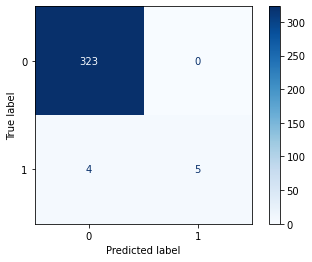

In [19]:
preds_rfc = rs_rfc.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, preds_rfc).ravel()

plot_confusion_matrix(rs_rfc, X_test, y_test, cmap='Blues', values_format='d');

In [22]:
rfc_train_score = rs_rfc.score(X_train_smote,y_train_smote)
rfc_test_score = rs_rfc.score(X_test,y_test)
rfc_test_sensitivity = tp / (tp + fn)
rfc_test_specificty = tn / (tn + fp)
rfc_roc_auc = roc_auc_score(y_test,rs_rfc.predict_proba(X_test)[:,1])

In [23]:
print(f'Random Forest Train Accuracy: {rfc_train_score}')
print(f'Random Forest Test Accuracy: {rfc_test_score}')
print(f'Random Forest Test Sensitivity: {rfc_test_sensitivity}')
print(f'Random Forest Test Specificity: {rfc_test_specificty}')
print(f'Random Forest Test ROC-AUC Score: {rfc_roc_auc}')

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.7777777777777778
Random Forest Test Sensitivity: 0.5555555555555556
Random Forest Test Specificity: 1.0
Random Forest Test ROC-AUC Score: 0.9920880632954937


#### Extra Trees

In [24]:
et = ExtraTreesClassifier()

In [25]:
et_params = {'n_estimators': [100,500,750,1000],
              'max_depth': [5,10,15,20],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [2, 3, 4, 5],
              'max_features': ['auto'],
              'class_weight': ["balanced",None],
              'bootstrap': [True,False]
         }

In [26]:
rs_et = RandomizedSearchCV(rfc,
                            rfc_params,
                            cv=3,
                            random_state = 42,
                            n_iter = 2000,
                            n_jobs = -2,
                            scoring = 'balanced_accuracy',
                            verbose=1)

In [27]:
rs_et.fit(X_train_smote,y_train_smote)

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 512 is smaller than n_iter=2000. Running 512 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 512 candidates, totalling 1536 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=2000,
                   n_jobs=-2,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 500, 750, 1000]},
                   random_state=42, scoring='balanced_accuracy', verbose=1)

In [28]:
rs_et.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10,
 'class_weight': 'balanced'}

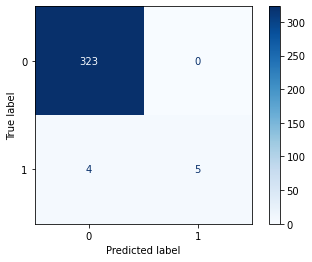

In [29]:
preds_et = rs_et.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, preds_et).ravel()

plot_confusion_matrix(rs_et, X_test, y_test, cmap='Blues', values_format='d');

In [30]:
et_train_score = rs_et.score(X_train_smote,y_train_smote)
et_test_score = rs_et.score(X_test,y_test)
et_test_sensitivity = tp / (tp + fn)
et_test_specificty = tn / (tn + fp)
et_roc_auc = roc_auc_score(y_test,rs_et.predict_proba(X_test)[:,1])

In [31]:
print(f'Extra Trees Train Accuracy: {et_train_score}')
print(f'Extra Trees Test Accuracy: {et_test_score}')
print(f'Extra Trees Test Sensitivity: {et_test_sensitivity}')
print(f'Extra Trees Test Specificity: {et_test_specificty}')
print(f'Extra Trees Test ROC-AUC Score: {et_roc_auc}')

Extra Trees Train Accuracy: 1.0
Extra Trees Test Accuracy: 0.7777777777777778
Extra Trees Test Sensitivity: 0.5555555555555556
Extra Trees Test Specificity: 1.0
Extra Trees Test ROC-AUC Score: 0.9948400412796697
